In [1]:
import sys; print('Python \t\t{0[0]}.{0[1]}'.format(sys.version_info))
import tensorflow as tf; print('Tensorflow \t{}'.format(tf.__version__))
import keras; print('Keras \t\t{}'.format(keras.__version__))

Python 		3.6
Tensorflow 	1.0.0


Using TensorFlow backend.


Keras 		2.0.3


In [2]:
%matplotlib inline 

import matplotlib.pyplot as plt
plt.style.use('ggplot')

import numpy as np

In [3]:
#linear regression, with additive noise
f = lambda x, e: 2*x + 3 + e
f_vec =  np.vectorize(f)

In [4]:
samples = 1000
e = np.random.normal(0.0, 0.2, samples)
x = np.random.rand(samples)
y = f_vec(x,e)

# transform into columns
x = x.reshape(-1,1)
y = y.reshape(-1,1)

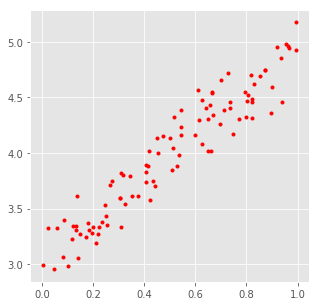

In [5]:
plt.figure(figsize=(5,5))
plt.plot(x[:100], y[:100], 'r.')
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.01, random_state=42)

In [7]:
from keras.models import Sequential
from keras.layers.core import Dense

In [8]:
model = Sequential()
model.add(Dense(1, input_dim=1))

In [9]:
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=["accuracy"])

In [10]:
model.fit(x_train, y_train,
          batch_size=5, epochs=10, verbose=1,
          validation_data=(x_test, y_test))

Train on 990 samples, validate on 10 samples
Epoch 1/10
990/990 [==============================] - 0s - loss: 2.0997 - acc: 0.0000e+00 - val_loss: 0.0654 - val_acc: 0.0000e+00
Epoch 2/10
990/990 [==============================] - 0s - loss: 0.0703 - acc: 0.0000e+00 - val_loss: 0.0497 - val_acc: 0.0000e+00
Epoch 3/10
990/990 [==============================] - 0s - loss: 0.0575 - acc: 0.0000e+00 - val_loss: 0.0514 - val_acc: 0.0000e+00
Epoch 4/10
990/990 [==============================] - 0s - loss: 0.0501 - acc: 0.0000e+00 - val_loss: 0.0484 - val_acc: 0.0000e+00
Epoch 5/10
990/990 [==============================] - 0s - loss: 0.0457 - acc: 0.0000e+00 - val_loss: 0.0479 - val_acc: 0.0000e+00
Epoch 6/10
990/990 [==============================] - 0s - loss: 0.0430 - acc: 0.0000e+00 - val_loss: 0.0428 - val_acc: 0.0000e+00
Epoch 7/10
990/990 [==============================] - 0s - loss: 0.0414 - acc: 0.0000e+00 - val_loss: 0.0445 - val_acc: 0.0000e+00
Epoch 8/10
990/990 [==================

In [11]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy (MSE):', score[0])

Test accuracy (MSE): 0.0472749248147


In [12]:
y_test_predict = model.predict(x_test)
np.hstack([x_test[:10],y_test_predict[:10]])

array([[ 0.41693318,  3.83040857],
       [ 0.75587638,  4.48687649],
       [ 0.46316869,  3.91995764],
       [ 0.65306373,  4.28774786],
       [ 0.60201791,  4.18888187],
       [ 0.71632451,  4.41027164],
       [ 0.54853563,  4.08529711],
       [ 0.84786116,  4.66503334],
       [ 0.17868096,  3.3689599 ],
       [ 0.63185176,  4.24666452]])

In [13]:
w, b = model.layers[0].get_weights()
w_ = w[0][0]
b_ = b[0]
print("Regression a = {:.2}, b = {:.2}".format(w_, b_))

Regression a = 1.9, b = 3.0


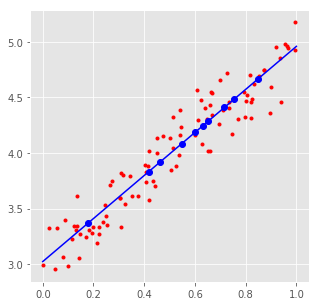

In [14]:
plt.figure(figsize=(5,5))
plt.plot(x[:100], y[:100], 'r.')
plt.plot(x_test, y_test_predict, 'bo')
plt.plot([b_,w_*1+b_], 'b-')
plt.show()